# PRCP-1012: Game Winner Prediction
### Predicting PUBG Match Win Probability


## Objective

The objective of this project is to build and compare multiple machine learning models to predict the winning outcome of players in an online battle game using gameplay statistics.

This project demonstrates the complete machine learning pipeline including data loading, exploratory data analysis (EDA), data preprocessing, model training, model evaluation, and comparison of multiple algorithms to select the best performing model.

In [1]:
#Core libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

## Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("pubg.csv")

In [3]:
print(df.shape)
df.head()

(4446966, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [6]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

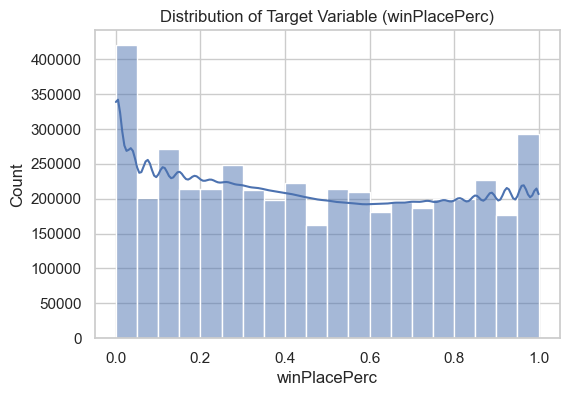

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["winPlacePerc"], bins=20, kde=True)
plt.title("Distribution of Target Variable (winPlacePerc)")
plt.show()

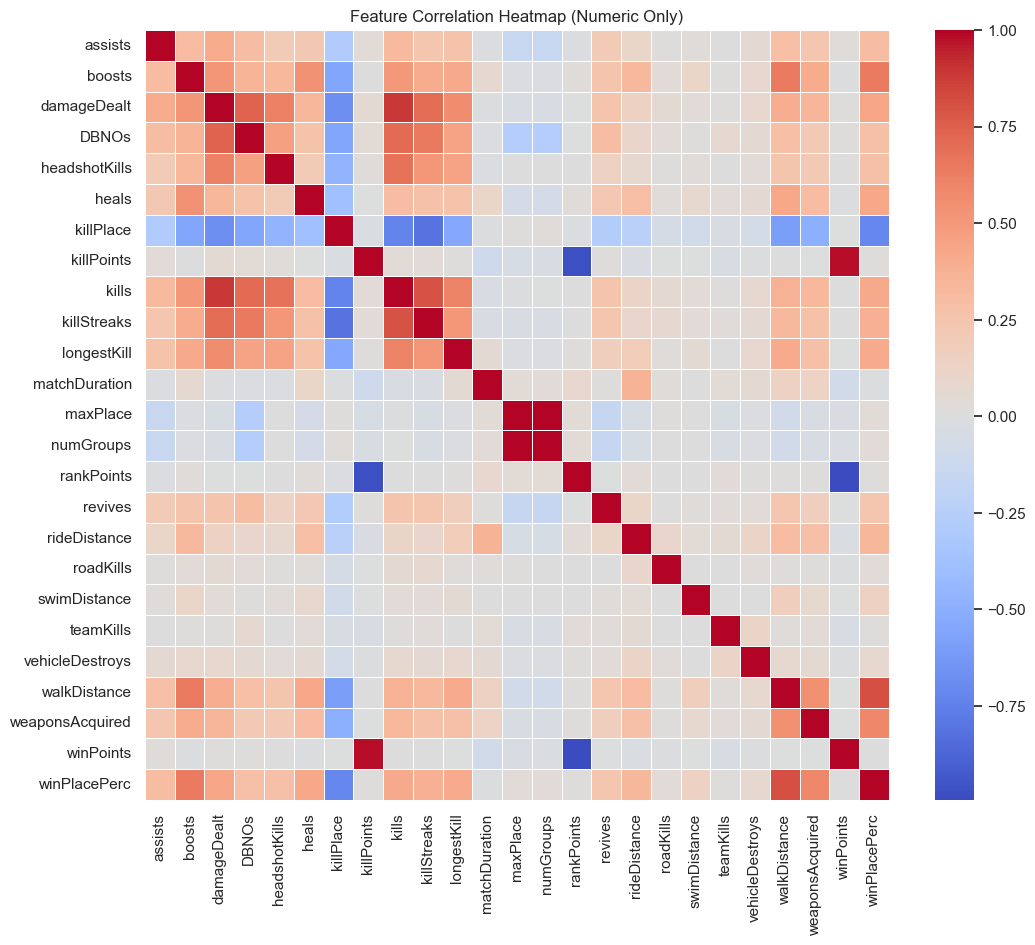

In [8]:
plt.figure(figsize=(12,10))

numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap (Numeric Only)")
plt.show()

## Data Preprocessing

In [9]:
df = df.drop(columns=["Id", "groupId", "matchId"], errors = "ignore")

In [10]:
df = df.dropna()

In [11]:
df["winClass"] = pd.cut(
    df["winPlacePerc"],
    bins=[-0.01, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=[0, 1, 2, 3, 4]
)

df = df.drop(columns=["winPlacePerc"])

In [12]:
X = df.drop(columns=["winClass"])
y = df["winClass"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

In [17]:
import numpy as np

X_train = np.hstack((X_train_num, X_train_cat))
X_test = np.hstack((X_test_num, X_test_cat))

## Model Training and Evaluation

### Logistic Regression

In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

acc_lr

0.6847243007309479

In [19]:
import joblib
joblib.dump(lr, "logistic_model.pkl")

['logistic_model.pkl']

In [20]:
import os, joblib

if os.path.exists("logistic_model.pkl"):
    lr = joblib.load("logistic_model.pkl")
    print("Loaded saved Logistic Regression model")
else:
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    joblib.dump(lr, "logistic_model.pkl")

Loaded saved Logistic Regression model


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt

0.6758688228938163

In [23]:
import joblib
joblib.dump(dt, "dt_model.pkl")

['dt_model.pkl']

In [24]:
import os, joblib
from sklearn.tree import DecisionTreeClassifier

if os.path.exists("dt_model.pkl"):
    dt = joblib.load("dt_model.pkl")
    print("Loaded saved Decision Tree model")
else:
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    joblib.dump(dt, "dt_model.pkl")
    print("Trained and saved Decision Tree model")

Loaded saved Decision Tree model


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,      # reduced
    max_depth=20,         # limits tree size
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [26]:
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.7555669990656549

### Model Comparison Table

In [27]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [acc_lr, acc_dt, acc_rf]
})

results.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.755567
0,Logistic Regression,0.684724
1,Decision Tree,0.675869


## Model Comparison Report

Three classification models were implemented and evaluated:

1. Logistic Regression  
2. Decision Tree  
3. Random Forest  

### Performance Summary

- Logistic Regression Accuracy: 68.47%
- Decision Tree Accuracy: 67.59%
- Random Forest Accuracy: 75.56%

### Analysis

Logistic Regression performed reasonably well but assumes linear 
relationships between features and target, which may limit its ability 
to capture complex interactions.

Decision Tree provided interpretability but showed slightly lower accuracy 
and risk of overfitting.

Random Forest achieved the highest accuracy among all models. 
By combining multiple decision trees, it reduces overfitting 
and captures complex feature interactions effectively.

### Model Recommended for Production

Based on performance comparison and generalization capability, 
Random Forest is recommended for production deployment 
as it provides the highest predictive accuracy and better robustness.

## Report on Challenges Faced

During the development of this project, several challenges were encountered:

### 1. Large Dataset Size
The dataset contains a large number of observations, which increased computational time 
and memory usage during model training.

Technique Used:
Model complexity was controlled by reducing the number of estimators and limiting 
maximum depth in Random Forest.

Reason:
Reducing tree depth and number of estimators helps control overfitting, 
reduces memory usage, and improves training efficiency.

---

### 2. Categorical Feature (matchType)

The feature "matchType" was categorical and could not be directly used 
in machine learning models.

Technique Used:
OneHotEncoder was applied to convert categorical values into numerical format.

Reason:
Most ML algorithms require numerical input. One-hot encoding preserves 
category information without introducing ordinal bias.

---

### 3. Feature Scaling Errors

Errors occurred when scaling was applied to non-numeric columns.

Technique Used:
Numerical and categorical features were separated before applying StandardScaler 
only to numerical columns.

Reason:
StandardScaler works only on numerical data. Separating features prevents 
type conversion errors and avoids data leakage.

---

### 4. Risk of Data Leakage

Applying scaling before train-test split could lead to data leakage.

Technique Used:
Train-test split was performed before scaling and encoding.

Reason:
This ensures that the model does not gain information from the test data 
during training, maintaining fair evaluation.

---

### 5. Model Selection and Computational Cost

K-Nearest Neighbors (KNN) was initially considered but was computationally 
expensive for large datasets.

Technique Used:
More scalable models such as Logistic Regression, Decision Tree, and 
Random Forest were selected instead.

Reason:
Tree-based and linear models scale better on large datasets and provide 
better trade-offs between accuracy and computation time.